<a href="https://colab.research.google.com/github/Nuelky/Finance/blob/main/MScFE_622_STOCHASTIC_MODELING_GWP2_7907_v0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Group 7907: Stochastic Modeling Group Work Project 2*** #

---
|  |  |
|:---|:---|
|**Team member 1** |  Vaibhav Janve |
|**Team member 2** | Emmanuel Kossy Okonkwo  |
|**Team member 3** | Thanh Tien Bui |

**Step 1**:<br>
Each team member works individually collecting 1 financial time series. All the ti
series should be from 2 or more different asset classes (e.g. equities, rates, credits,
cryptocurrencies). All the time series should span the years 2019 – 2022. Note that
series need not be prices, but can include returns, volatilities, default probabilities,
yields, etc.

the desk is testing for, and model, regime switching time series models.

The data consists of time period starting in Jan,2019 (pre-COVID) - September,2022.

Our team’s time series data consists of three different asset classes (Crypto, volatility, and treasury) for 3 year period spanning from 2019-01-01 to 2023-01-01 at weekly frequency:
* Grayscale Bitcoin Mini Trust ETF (BTC) price.
* CBOE Volatility Index (VIX)
* CBOE 5-Year Treasury Note Yield Index (FVX)

We considered both daily, mothly and weekly frequencies and decided on weekly to help analysis faster and more precise than monthly.


In [ ]:
# install and load needed libraries
!pip install yfinance

In [ ]:
# install and load needed libraries
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from scipy.stats import norm

import warnings

warnings.filterwarnings("ignore")

**Member A**


In [ ]:
# CBOE Volatility Index (^VIX)
vix = yf.download('^VIX', start='2019-01-01', end='2023-01-01', interval='1d')
# Treasury Yield 5 Years (^FVX)
fvxHistory = yf.download('^FVX', start='2019-01-01', end='2023-01-01', interval='1d')
# CBOE Interest Rate 10 Year T No (^TNX)
tenYear = yf.download('^TNX', start='2019-01-01', end='2023-01-01', interval='1d')
# Treasury Yield 30 Years (^TYX)
thirtyYear = yf.download('^TYX', start='2019-01-01', end='2023-01-01', interval='1d')
# not working
## S&P U.S. Treasury Bond 0-1 Year (^SPBDUS1T)
#oneYear = yf.download('^SPBDUS1T', start='2019-01-01', end='2023-01-01', interval='1d')
## U.S. 2 Year Treasury Note (^TMUBMUSD02Y)
#twoYear = yf.download('^TMUBMUSD02Y', start='2019-01-01', end='2023-01-01', interval='1d')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
print(vix.info())
print(fvxHistory.info())
print(tenYear.info())
print(thirtyYear.info())
#print(oneYear.info())
#print(twoYear.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2019-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, ^VIX)   1008 non-null   float64
 1   (High, ^VIX)    1008 non-null   float64
 2   (Low, ^VIX)     1008 non-null   float64
 3   (Open, ^VIX)    1008 non-null   float64
 4   (Volume, ^VIX)  1008 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.2 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1008 entries, 2019-01-02 to 2022-12-30
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, ^FVX)   1008 non-null   float64
 1   (High, ^FVX)    1008 non-null   float64
 2   (Low, ^FVX)     1008 non-null   float64
 3   (Open, ^FVX)    1008 non-null   float64
 4   (Volume, ^FVX)  1008 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.2 KB
None
<class 'pa

## volumne data not available on Yahoo finance

In [ ]:
# not getting volumes
print(vix.head(2))
print(fvxHistory.head(2))
print(tenYear.head(2))
print(thirtyYear.head(2))
#print(oneYear.head(2))
#print(twoYear.head(2))

Price           Close       High        Low       Open Volume
Ticker           ^VIX       ^VIX       ^VIX       ^VIX   ^VIX
Date                                                         
2019-01-02  23.219999  28.530001  23.049999  27.540001      0
2019-01-03  25.450001  26.600000  24.049999  25.680000      0
Price       Close   High    Low   Open Volume
Ticker       ^FVX   ^FVX   ^FVX   ^FVX   ^FVX
Date                                         
2019-01-02  2.503  2.514  2.484  2.489      0
2019-01-03  2.368  2.496  2.368  2.496      0
Price       Close   High    Low   Open Volume
Ticker       ^TNX   ^TNX   ^TNX   ^TNX   ^TNX
Date                                         
2019-01-02  2.661  2.679  2.649  2.652      0
2019-01-03  2.554  2.656  2.554  2.654      0
Price       Close   High    Low   Open Volume
Ticker       ^TYX   ^TYX   ^TYX   ^TYX   ^TYX
Date                                         
2019-01-02  2.982  3.008  2.982  2.987      0
2019-01-03  2.900  2.974  2.900  2.971      0


In [ ]:
#check for missingness in the data
# No missing data
vix.isna().sum()
fvxHistory.isna().sum()
tenYear.isna().sum()
thirtyYear.isna().sum()
#oneYear.isna().sum()
#twoYear.isna().sum()

,,0
Price,Ticker,
Close,^TYX,0
High,^TYX,0
Low,^TYX,0
Open,^TYX,0
Volume,^TYX,0


## No missingness

**Member B**

In [ ]:
import yfinance
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

import warnings

warnings.filterwarnings("ignore")

In [ ]:
fvx=yfinance.Ticker("^FVX")

In [ ]:
fvxHistory=fvx.history(start="2019-01-01",end="2022-12-31")

In [ ]:
fvxHistory.isna().any()

,0
Open,False
High,False
Low,False
Close,False
Volume,False
Dividends,False
Stock Splits,False


Using financial data from Yahoo Finance for  the 5-year Treasury Yield (^FVX).from 01/01/2019 to 12/31/2022, we ensured that there were no missing observation after initial EDA.

**Member C**

In [ ]:
!pip install yfinance

In [ ]:
import yfinance as yf
btc_dataset = yf.download('BTC-USD', start='2019-01-01', end='2023-01-01', interval='1wk')

[*********************100%***********************]  1 of 1 completed


In [ ]:
btc_dataset.head(5)

Price,Close,High,Low,Open,Volume
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD
Date,,,,,
2019-01-01,4025.248291,4093.297363,3707.231201,3746.713379,34910501413
2019-01-08,3706.052246,4109.020996,3544.927246,4028.472168,37946213030
2019-01-15,3576.032471,3758.533447,3558.537109,3704.216309,37941559556
2019-01-22,3470.450439,3654.933105,3439.232910,3575.081299,38853962474
2019-01-29,3459.154053,3523.287354,3400.819824,3468.870117,38554677169


In [ ]:
btc_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 209 entries, 2019-01-01 to 2022-12-27
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   209 non-null    float64
 1   (High, BTC-USD)    209 non-null    float64
 2   (Low, BTC-USD)     209 non-null    float64
 3   (Open, BTC-USD)    209 non-null    float64
 4   (Volume, BTC-USD)  209 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 9.8 KB


**Step 2**
visualizations of the series showing regime change.
identify the approximate dates of the regimes, and the levels
of the series. The group then decides on 1 series to model.
We selected: ...

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

In [ ]:
import pandas_datareader.data as web
import datetime

fed_interest_rates = web.DataReader('FEDFUNDS', 'fred', '2019-01-01', '2023-01-01')
fed_interest_rates.head()

,FEDFUNDS
DATE,
2019-01-01,2.40
2019-02-01,2.40
2019-03-01,2.41
2019-04-01,2.42
2019-05-01,2.39


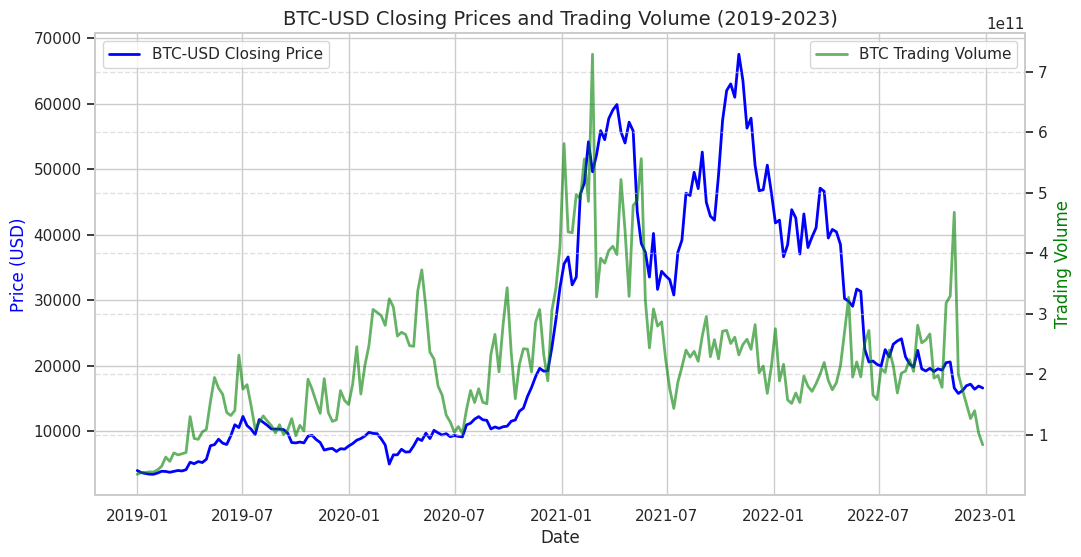

In [ ]:
plt.figure(figsize=(12, 6))

# Plot BTC Closing Price on the primary y-axis
plt.plot(btc_dataset['Close'], label='BTC-USD Closing Price', color='blue', linewidth=2)

# Create a secondary y-axis for Trading Volume
ax1 = plt.gca()
ax2 = ax1.twinx()
ax2.plot(btc_dataset['Volume'], label='BTC Trading Volume', color='green', linewidth=2, alpha=0.6)

# Titles and labels
plt.title('BTC-USD Closing Prices and Trading Volume (2019-2023)', fontsize=14)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Price (USD)', fontsize=12, color='blue')
ax2.set_ylabel('Trading Volume', fontsize=12, color='green')

# Gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.6)

# Legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


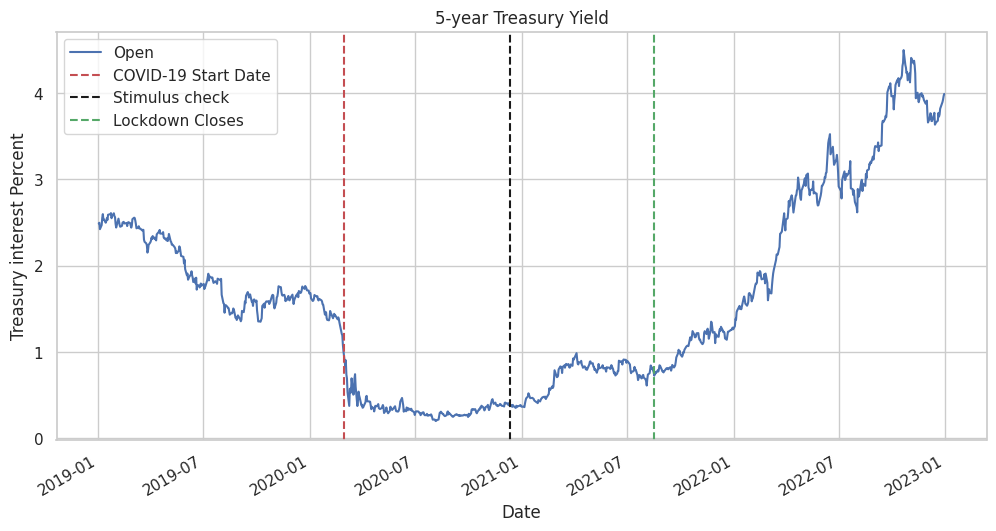

In [ ]:
plt.figure(figsize=(12, 6))
fvxHistory['Open'].plot()
plt.title('5-year Treasury Yield')
plt.axvline('2020-03-01', color='r', linestyle='--', label='COVID-19 Start Date')
plt.axvline('2020-12-12', color='k', linestyle='--', label='Stimulus check')
plt.axvline('2021-08-16', color='g', linestyle='--', label='Lockdown Closes')
plt.ylabel('Treasury interest Percent')
plt.legend()
plt.show()

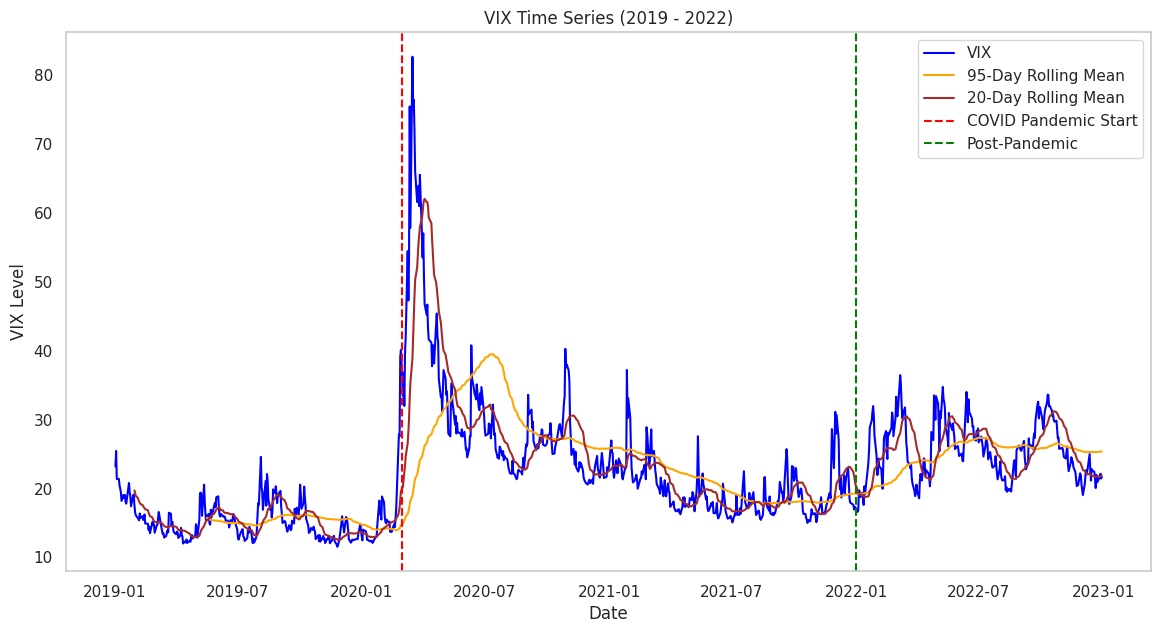

In [ ]:
# Set the style for the plots
sns.set(style="whitegrid")

# Define the time period for the analysis
start_date = '2019-01-01'
end_date = '2022-12-31'

# Calculate rolling mean and standard deviation to identify regimes
rolling_mean = vix['Close'].rolling(window=95).mean()
rolling_mean20 = vix['Close'].rolling(window=20).mean()
rolling_std = vix['Close'].rolling(window=95).std()

# Plot the VIX time series
plt.figure(figsize=(14, 7))
plt.plot(vix['Close'], label='VIX', color='blue')
plt.plot(rolling_mean, label='95-Day Rolling Mean', color='orange')
plt.plot(rolling_mean20, label='20-Day Rolling Mean', color='brown')

plt.title('VIX Time Series (2019 - 2022)')
plt.xlabel('Date')
plt.ylabel('VIX Level')
plt.axvline(pd.Timestamp('2020-03-01'), color='red', linestyle='--', label='COVID Pandemic Start')
plt.axvline(pd.Timestamp('2022-01-01'), color='green', linestyle='--', label='Post-Pandemic')
plt.legend()
plt.grid()
plt.show()

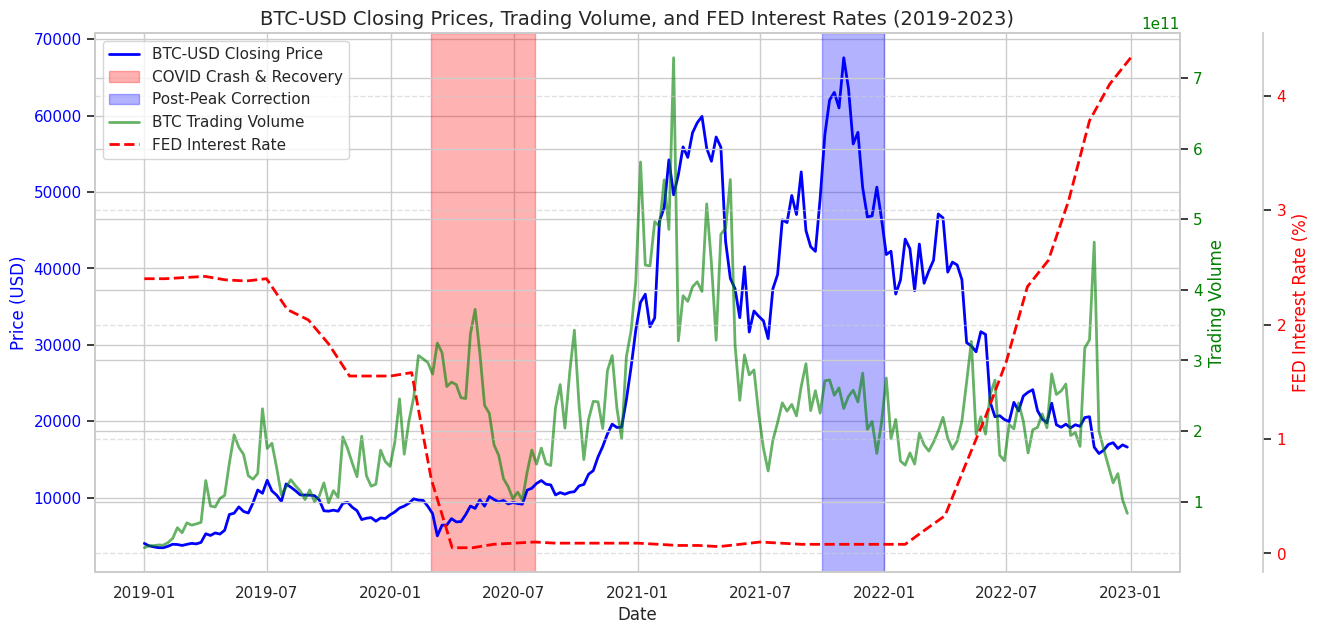

In [ ]:
# Plot BTC Closing Price and Trading Volume with Interest Rates
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot BTC Closing Price on the primary y-axis
ax1.plot(btc_dataset['Close'], label='BTC-USD Closing Price', color='blue', linewidth=2)
ax1.set_xlabel('Date', fontsize=12)
ax1.set_ylabel('Price (USD)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for BTC Trading Volume
ax2 = ax1.twinx()
ax2.plot(btc_dataset['Volume'], label='BTC Trading Volume', color='green', linewidth=2, alpha=0.6)
ax2.set_ylabel('Trading Volume', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Create a third y-axis for FED Interest Rates
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # Offset the third axis for clarity
ax3.plot(fed_interest_rates['FEDFUNDS'], label='FED Interest Rate', color='red', linestyle='--', linewidth=2)
ax3.set_ylabel('FED Interest Rate (%)', fontsize=12, color='red')
ax3.tick_params(axis='y', labelcolor='red')

# Highlight specific regions with axvspan
ax1.axvspan('2020-03-01', '2020-08-01', color='red', alpha=0.3, label='COVID Crash & Recovery')
ax1.axvspan('2021-10-01', '2022-01-01', color='blue', alpha=0.3, label='Post-Peak Correction')

# Add title and gridlines
plt.title('BTC-USD Closing Prices, Trading Volume, and FED Interest Rates (2019-2023)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Combine legends from all axes
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
lines_3, labels_3 = ax3.get_legend_handles_labels()
plt.legend(lines_1 + lines_2 + lines_3, labels_1 + labels_2 + labels_3, loc='upper left')

plt.show()


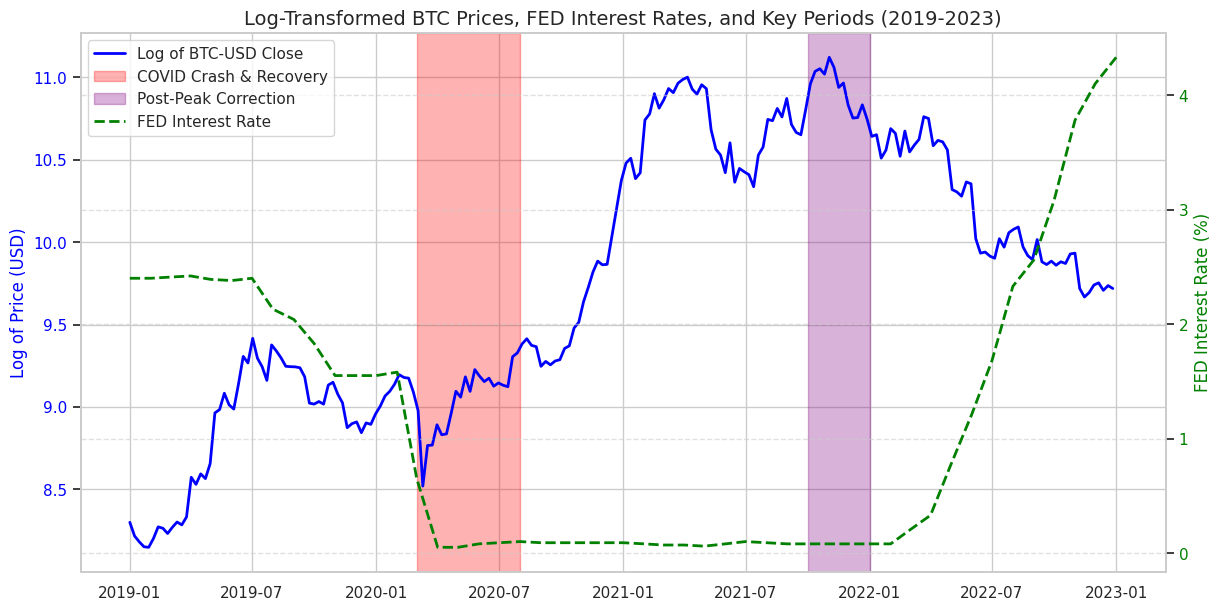

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

btc_dataset['Log_Close'] = np.log(btc_dataset['Close'])  # Calculate log-transformed closing prices

plt.figure(figsize=(14, 7))

# Plot Log-Transformed BTC Closing Price on the primary y-axis
ax1 = plt.gca()
ax1.plot(btc_dataset.index, btc_dataset['Log_Close'], label='Log of BTC-USD Close', color='blue', linewidth=2)
ax1.set_ylabel('Log of Price (USD)', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Highlight specific periods with axvspan
ax1.axvspan('2020-03-01', '2020-08-01', color='red', alpha=0.3, label='COVID Crash & Recovery')
ax1.axvspan('2021-10-01', '2022-01-01', color='purple', alpha=0.3, label='Post-Peak Correction')

# Add FED Interest Rates on the secondary y-axis
ax2 = ax1.twinx()
ax2.plot(fed_interest_rates.index, fed_interest_rates['FEDFUNDS'], label='FED Interest Rate', color='green', linestyle='--', linewidth=2)
ax2.set_ylabel('FED Interest Rate (%)', fontsize=12, color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Title and grid
plt.title('Log-Transformed BTC Prices, FED Interest Rates, and Key Periods (2019-2023)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)

# Combine legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
plt.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.show()


In [ ]:
btc_dataset.head()

Price,Close,High,Low,Open,Volume,Log_Close
Ticker,BTC-USD,BTC-USD,BTC-USD,BTC-USD,BTC-USD,
Date,,,,,,
2019-01-01,4025.248291,4093.297363,3707.231201,3746.713379,34910501413,8.300342
2019-01-08,3706.052246,4109.020996,3544.927246,4028.472168,37946213030,8.217723
2019-01-15,3576.032471,3758.533447,3558.537109,3704.216309,37941559556,8.182009
2019-01-22,3470.450439,3654.933105,3439.232910,3575.081299,38853962474,8.152040
2019-01-29,3459.154053,3523.287354,3400.819824,3468.870117,38554677169,8.148779


In [ ]:
YData = btc_dataset['Log_Close'].dropna()
YData.head()

,Log_Close
Date,
2019-01-01,8.300342
2019-01-08,8.217723
2019-01-15,8.182009
2019-01-22,8.152040
2019-01-29,8.148779


In [ ]:
# Estimation of model with changes in volatility regimes

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import norm

# Estimation of model with changes in volatility regimes
# Build function that performs the E step
# Likelihood of an observation


def likelihood(xi_prob, mu, sigma, y):
    phi = norm.pdf((y - mu) / sigma)
    y_like = np.dot(xi_prob, phi)

    return y_like

#define functions that compute log-likelihood
def log_likelihood(xi_prob_t1, pi0,  mu, sigma, Y):
    T = len(Y)
    y_like = np.zeros(T)
    y_like[0] = likelihood(pi0, mu, sigma, Y[0])
    for tt in range(1,T):
        y_like[tt] = likelihood(xi_prob_t1[tt - 1,:], mu, sigma, Y[tt])
    print(xi_prob_t1, pi0,  mu, sigma, Y)
    sum_log_like = -np.sum(np.log(y_like))
    return sum_log_like

# Hamilton filtering
def forward_alg(pi_hat0, N, T, P, mu, sigma, Y):
    xi_prob_t = np.zeros((T, N))
    xi_prob_t1 = np.zeros((T, N))

    # Case t=1
    y_like = likelihood(pi_hat0, mu, sigma, Y[0])
    for ss in range(0, N):
        phi = np.zeros((N))
        for ss2 in range(0, N):
            phi[ss2] = norm.pdf((Y[0] - mu[ss2]) / sigma[ss2])
    xi_prob_t[0, :] = np.multiply(pi_hat0, phi) / y_like
    for ss in range(0, N):
        xi_prob_t1[0, ss] = np.dot(P[:, ss], xi_prob_t[0, :])

    for tt in range(1, T):
        y_like = likelihood(xi_prob_t1[tt - 1, :], mu, sigma, Y[tt])
        for ss in range(0, N):
            phi = np.zeros((N))
            for ss2 in range(0, N):
                phi[ss2] = norm.pdf((Y[tt] - mu[ss2]) / sigma[ss2])
        xi_prob_t[tt, :] = np.multiply(xi_prob_t1[tt - 1, :], phi) / y_like
        for ss in range(0, N):
            xi_prob_t1[tt, ss] = np.dot(P[:, ss], xi_prob_t[tt, :])

    return xi_prob_t, xi_prob_t1


# Kim filtering
def backward_alg(xi_prob_t, xi_prob_t1, N, T, P, mu, sigma, Y):
    xi_prob_T = np.zeros((T, N))
    xi_prob_T[T - 1, :] = xi_prob_t[T - 1, :]

    for tt in range(T - 2, -1, -1):
        xi_T_xi = np.divide(xi_prob_T[tt + 1, :], xi_prob_t1[tt, :])
        for ss in range(0, N):
            xi_prob_T[tt, ss] = xi_prob_t[tt, ss] * np.dot(P[ss, :], xi_T_xi)

    return xi_prob_T  # , xi_prob_T1


def M_step_func(xi_prob, P, N, T, Y):  #
    mu_hat = np.zeros((N))
    sigma_hat = np.zeros((N))
    P_hat = np.zeros((N, N))
    pi_hat = np.zeros((N))

    for ss in range(0, N):
        xi_y = np.dot(xi_prob[:, ss], Y)
        mu_hat[ss] = xi_y / np.sum(xi_prob[:, ss])

        xi_y_mu2 = np.dot(xi_prob[:, ss], (Y - mu_hat[ss]) ** 2)
        sigma_hat[ss] = (xi_y_mu2 / np.sum(xi_prob[:, ss])) ** 0.5

        for ss2 in range(0, N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(
                P[ss, :, 1:]
            )  # /np.sum(xi_prob[0:T-1,ss]) #np.sum(P[ss,:,1:T])
            # print( np.sum(xi_prob[0:T-1,ss]), np.sum(P[ss,:,1:T]))

        pi_hat[ss] = xi_prob[0, ss]

    return mu_hat, sigma_hat, P_hat, pi_hat

def M_step_func_shared_variance(xi_prob, P, N, T, Y):
    mu_hat = np.zeros((N))
    sigma_hat = np.zeros((N))
    P_hat = np.zeros((N, N))
    pi_hat = np.zeros((N))

    s = 0

    for ss in range(0, N):
        xi_y = np.dot(xi_prob[:, ss], Y)
        mu_hat[ss] = xi_y / np.sum(xi_prob[:, ss])

        xi_y_mu2 = np.dot(xi_prob[:, ss], (Y - mu_hat[ss]) ** 2)
        s += xi_y_mu2

        for ss2 in range(0, N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(
                P[ss, :, 1:]
            )  # /np.sum(xi_prob[0:T-1,ss]) #np.sum(P[ss,:,1:T])
            # print( np.sum(xi_prob[0:T-1,ss]), np.sum(P[ss,:,1:T]))

        pi_hat[ss] = xi_prob[0, ss]

    for i in range(0, N):
      sigma_hat[i] = (s / T) ** 0.5

    return mu_hat, sigma_hat, P_hat, pi_hat

def M_step_func_shared_mu(xi_prob, P, N, T, Y):
    mu_hat = np.zeros((N))
    sigma_hat = np.zeros((N))
    P_hat = np.zeros((N, N))
    pi_hat = np.zeros((N))

    i, j = 0, 0

    for ss in range(0, N):
        xi_y = np.dot(xi_prob[:, ss], Y)
        i += xi_y
        j += np.sum(xi_prob[:, ss])

        xi_y_mu2 = np.dot(xi_prob[:, ss], Y ** 2)
        sigma_hat[ss] = (xi_y_mu2 / np.sum(xi_prob[:, ss])) ** 0.5

        for ss2 in range(0, N):
            P_hat[ss, ss2] = np.sum(P[ss, ss2, 1:]) / np.sum(
                P[ss, :, 1:]
            )  # /np.sum(xi_prob[0:T-1,ss]) #np.sum(P[ss,:,1:T])
            # print( np.sum(xi_prob[0:T-1,ss]), np.sum(P[ss,:,1:T]))

        pi_hat[ss] = xi_prob[0, ss]

    for ss in range(0, N):
      mu_hat[ss] = i / j

    return mu_hat, sigma_hat, P_hat, pi_hat

All team members collaborate to Estimate a Markov-regime switching model for
the selected financial time series. Estimate the model under different
assumptions:
1.   Different number of states.
2.   Allowing the expected realization of the time series to differ across states(different “mu's”), but with constant variance (same “sigma”).
3.   Allowing the variance of the time series to change across states (different
“sigmas”), but with constant expectation (same “mu”).
4.   Allowing for different expectations and variances across states.


51


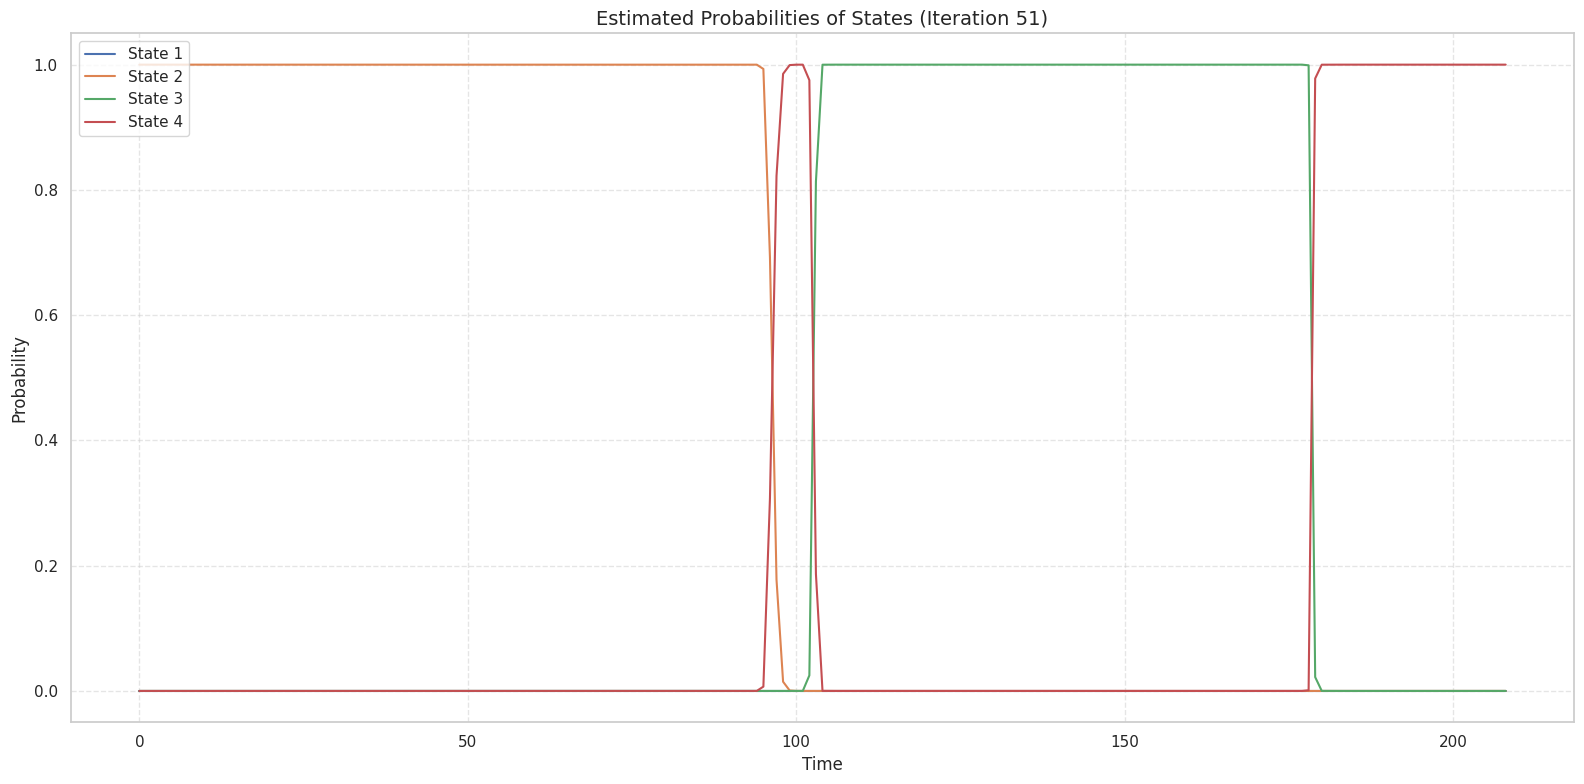

Final Estimates:
Mu: [ 9.13247747  8.9884527  10.68270598  9.8820642 ]
Sigma: [0.00066826 0.36264476 0.22083976 0.1185633 ]
Transition Matrix:
[[2.98552878e-151 1.00000000e+000 0.00000000e+000 0.00000000e+000]
 [2.61474331e-059 9.89677813e-001 7.71930074e-269 1.03221866e-002]
 [0.00000000e+000 9.22985421e-180 9.86815460e-001 1.31845397e-002]
 [0.00000000e+000 2.36057675e-096 2.83641678e-002 9.71635832e-001]]
Initial Probabilities: [0. 1. 0. 0.]
Maximum difference: 0.0005148673013504414
[[1.91507267e-057 9.89677813e-001 1.05432213e-263 1.03221866e-002]
 [1.91507267e-057 9.89677813e-001 4.59446700e-046 1.03221866e-002]
 [1.91507267e-057 9.89677813e-001 7.92837721e-048 1.03221866e-002]
 [1.91507267e-057 9.89677813e-001 2.46902953e-049 1.03221866e-002]
 [1.91507267e-057 9.89677813e-001 1.68703909e-049 1.03221866e-002]
 [1.91507267e-057 9.89677813e-001 7.81601215e-047 1.03221866e-002]
 [1.91507267e-057 9.89677813e-001 2.04185022e-043 1.03221866e-002]
 [1.91507267e-057 9.89677813e-001 8.0915

In [ ]:
# Initialize parameters
T = len(YData)
N = 4 # 4 states

# SET INITIAL GUESSES

mu_hat0 = [9.0, 8.8, 10.8, 9.8]*np.ones((N))
sigma_hat0 = [0.1, 0.3, 0.2, 0.15]*np.ones((N))
P_hat0 = np.zeros((N, N))

P_hat0[0,0] = 0.75
P_hat0[0,1] = 0.15
P_hat0[0,2] = 0.1
P_hat0[0,3] = 0

P_hat0[1,0] = 0.1
P_hat0[1,1] = 0.75
P_hat0[1,2] = 0.1
P_hat0[1,3] = 0.05

P_hat0[2,0] = 0.05
P_hat0[2,1] = 0.1
P_hat0[2,2] = 0.75
P_hat0[2,3] = 0.1

P_hat0[3,0] = 0
P_hat0[3,1] = 0.1
P_hat0[3,2] = 0.15
P_hat0[3,3] = 0.75

# Set as initial probability the stationary distribution
pi_hat0 = [0.25, 0.1, 0.4, 0.25]*np.ones((N))
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-2

for ite in range(0, itemax):
    # print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)

    # E-step
    xi_prob_t, xi_prob_t1 = forward_alg(
        pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )
    xi_prob_T = backward_alg(
        xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )


    # Compute Pr(s_t+1 = j, s_t = i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T):
        for ss in range(0, N):
            for ss2 in range(0, N):
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2]
                    * xi_prob_t[tt - 1, ss]
                    * xi_prob_T[tt, ss2]
                    / xi_prob_t1[tt - 1, ss2]
                )
    # M-step
    mu_hat1, sigma_hat1, P_hat1, pi_hat1 = M_step_func(xi_prob_T, P_hat_T, N, T, YData)

    diff = np.zeros((4))
    diff[0] = np.sum(np.absolute(mu_hat1 - mu_hat0)) / (np.min(mu_hat0) + itetol * 1e-2)
    diff[1] = np.sum(np.absolute(sigma_hat1 - sigma_hat0)) / (
        np.min(sigma_hat0) + itetol * 1e-2
    )
    diff[2] = np.sum(np.absolute(np.subtract(P_hat1, P_hat0))) / (
        np.min(P_hat0) + itetol * 1e-2
    )
    diff[3] = np.sum(np.absolute(pi_hat1 - pi_hat0)) / (np.min(pi_hat0) + itetol * 1e-2)
    if np.max(diff) > itetol:
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = mu_hat1, sigma_hat1, P_hat1, pi_hat1
    else:
        print(ite)
        plt.figure(figsize=(16, 8))
        for i in range(N):
            plt.plot(xi_prob_T[:, i], label=f"State {i+1}")
        plt.title(f"Estimated Probabilities of States (Iteration {ite})", fontsize=14)
        plt.xlabel("Time", fontsize=12)
        plt.ylabel("Probability", fontsize=12)
        plt.legend(loc='upper left')
        plt.grid(alpha=0.5, linestyle="--")
        plt.tight_layout()
        plt.show()
        print("Final Estimates:")
        print(f"Mu: {mu_hat1}")
        print(f"Sigma: {sigma_hat1}")
        print("Transition Matrix:")
        print(P_hat1)
        print(f"Initial Probabilities: {pi_hat1}")
        print(f"Maximum difference: {np.max(diff)}")
        llk = log_likelihood(xi_prob_t1, pi_hat0, mu_hat0, sigma_hat0, YData)
        print(f"Log likelihood: {llk}")
        break

1. Different number of states: 4 states

In [ ]:
# Function to compute AIC and BIC
def compute_information_criteria(log_likelihood, num_params, num_obs):
    aic = -2 * log_likelihood + 2 * num_params
    bic = -2 * log_likelihood + num_params * np.log(num_obs)
    return aic, bic

In [ ]:
num_obs = T  # Number of observations
num_params = 2 * N + N * (N - 1)  # Number of parameters
log_likelihood_val = 310.1902410098621
# Compute AIC and BIC
aic, bic = compute_information_criteria(log_likelihood_val, num_params, num_obs)
print(f"I. Wth 4 states: AIC: {aic}, BIC: {bic}")

I. Wth 4 states: AIC: -580.3804820197242, BIC: -513.5337969804281


10


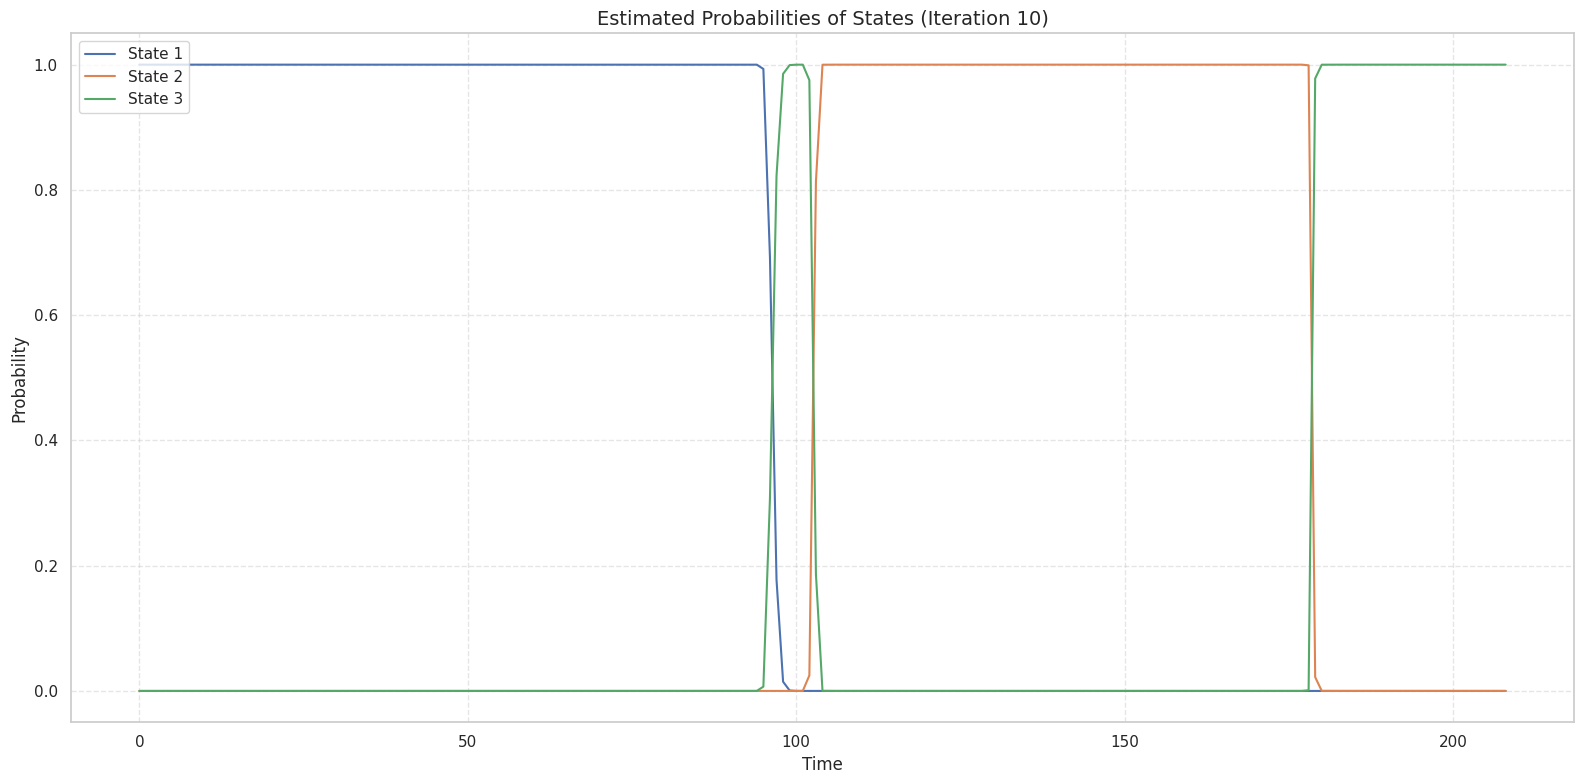

Final Estimates:
Mu: [ 8.98845255 10.68270609  9.88206421]
Sigma: [0.36264465 0.22083966 0.11856355]
Transition Matrix:
[[9.89677811e-01 2.95390553e-55 1.03221888e-02]
 [8.56012078e-39 9.86815457e-01 1.31845426e-02]
 [4.27890871e-20 2.83641368e-02 9.71635863e-01]]
Initial Probabilities: [1. 0. 0.]
Maximum difference: 0.0027510170701277852
[[9.89677803e-01 4.03498067e-50 1.03221975e-02]
 [9.89677803e-01 4.60392755e-46 1.03221975e-02]
 [9.89677803e-01 7.98504006e-48 1.03221975e-02]
 [9.89677803e-01 2.87779002e-49 1.03221975e-02]
 [9.89677803e-01 2.09414655e-49 1.03221975e-02]
 [9.89677803e-01 7.83574882e-47 1.03221975e-02]
 [9.89677803e-01 2.04561175e-43 1.03221975e-02]
 [9.89677803e-01 8.10657187e-44 1.03221975e-02]
 [9.89677803e-01 2.43548143e-45 1.03221975e-02]
 [9.89677803e-01 1.52661198e-43 1.03221975e-02]
 [9.89677803e-01 4.90554127e-42 1.03221975e-02]
 [9.89677803e-01 7.55259226e-43 1.03221975e-02]
 [9.89677803e-01 1.27677581e-40 1.03221975e-02]
 [9.89677803e-01 2.02282968e-30 1.0

In [ ]:
# Initialize parameters
T = len(YData)
N = 3 # 3 states

# SET INITIAL GUESSES

mu_hat0 = [8.8, 10.5, 10.0]*np.ones((N))
sigma_hat0 = [0.1, 0.3, 0.2]*np.ones((N))
P_hat0 = np.array([
    [0.75, 0.2, 0.05],
    [0.1, 0.8, 0.1],
    [0.05, 0.15, 0.8]
])
P_hat0 /= P_hat0.sum(axis=1, keepdims=True)  # Normalize rows

# Set as initial probability the stationary distribution
pi_hat0 = [0.25, 0.5, 0.25]*np.ones((N))
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-2

for ite in range(0, itemax):
    # print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)

    # E-step
    xi_prob_t, xi_prob_t1 = forward_alg(
        pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )
    xi_prob_T = backward_alg(
        xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )


    # Compute Pr(s_t+1 = j, s_t = i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T):
        for ss in range(0, N):
            for ss2 in range(0, N):
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2]
                    * xi_prob_t[tt - 1, ss]
                    * xi_prob_T[tt, ss2]
                    / xi_prob_t1[tt - 1, ss2]
                )
    # M-step
    mu_hat1, sigma_hat1, P_hat1, pi_hat1 = M_step_func(xi_prob_T, P_hat_T, N, T, YData)

    diff = np.zeros((4))
    diff[0] = np.sum(np.absolute(mu_hat1 - mu_hat0)) / (np.min(mu_hat0) + itetol * 1e-2)
    diff[1] = np.sum(np.absolute(sigma_hat1 - sigma_hat0)) / (
        np.min(sigma_hat0) + itetol * 1e-2
    )
    diff[2] = np.sum(np.absolute(np.subtract(P_hat1, P_hat0))) / (
        np.min(P_hat0) + itetol * 1e-2
    )
    diff[3] = np.sum(np.absolute(pi_hat1 - pi_hat0)) / (np.min(pi_hat0) + itetol * 1e-2)
    if np.max(diff) > itetol:
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = mu_hat1, sigma_hat1, P_hat1, pi_hat1
    else:
        print(ite)
        plt.figure(figsize=(16, 8))
        for i in range(N):
            plt.plot(xi_prob_T[:, i], label=f"State {i+1}")
        plt.title(f"Estimated Probabilities of States (Iteration {ite})", fontsize=14)
        plt.xlabel("Time", fontsize=12)
        plt.ylabel("Probability", fontsize=12)
        plt.legend(loc='upper left')
        plt.grid(alpha=0.5, linestyle="--")
        plt.tight_layout()
        plt.show()
        print("Final Estimates:")
        print(f"Mu: {mu_hat1}")
        print(f"Sigma: {sigma_hat1}")
        print("Transition Matrix:")
        print(P_hat1)
        print(f"Initial Probabilities: {pi_hat1}")
        print(f"Maximum difference: {np.max(diff)}")
        llk = log_likelihood(xi_prob_t1, pi_hat0, mu_hat0, sigma_hat0, YData)
        print(f"Log likelihood: {llk}")
        break

In [ ]:
num_obs = T  # Number of observations
num_params = 2 * N + N * (N - 1)  # Number of parameters
log_likelihood_val = 310.19017771735287  # Replace with your final log-likelihood

# Compute AIC and BIC
aic, bic = compute_information_criteria(log_likelihood_val, num_params, num_obs)
print(f"I. With 3 states: AIC: {aic}, BIC: {bic}")

I. With 3 states: AIC: -596.3803554347057, BIC: -556.272344411128


2. Allowing the expected realization of the time series to differ across states(different “mu's”), but with constant variance (same “sigma”).

8


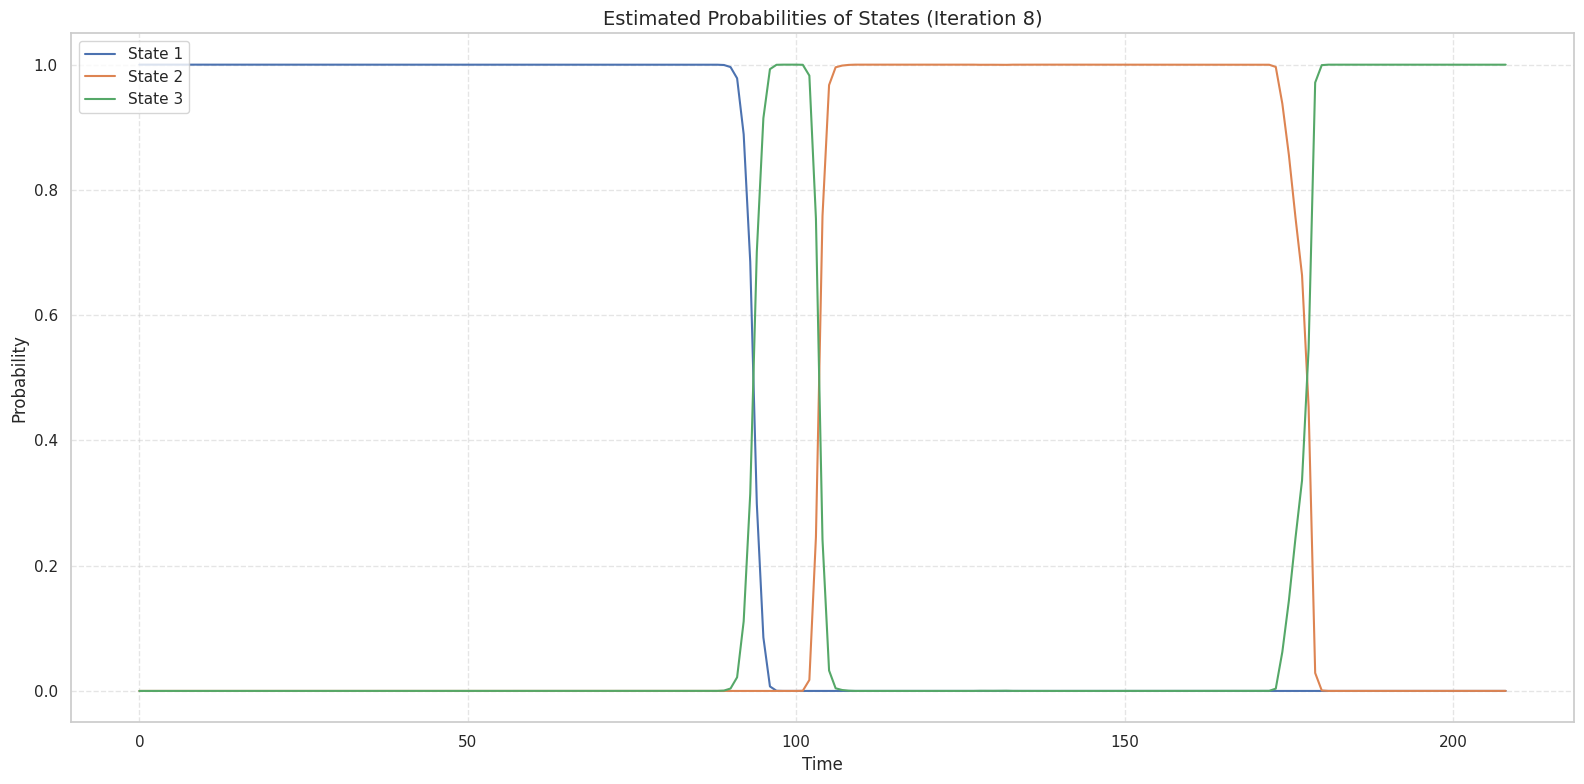

Final Estimates:
Mu: [ 8.97165414 10.6937769   9.87929603]
Sigma: [0.28128019 0.28128019 0.28128019]
Transition Matrix:
[[9.89354840e-01 4.13498066e-50 1.06451605e-02]
 [1.58078656e-49 9.86378419e-01 1.36215810e-02]
 [2.74186884e-22 2.48505834e-02 9.75149417e-01]]
Initial Probabilities: [1.00000000e+000 2.97270815e-289 1.73562355e-149]
Maximum difference: 0.005980695289166286
[[9.89354819e-01 9.40198730e-45 1.06451807e-02]
 [9.89354809e-01 2.57003030e-10 1.06451907e-02]
 [9.89354812e-01 1.70611838e-10 1.06451873e-02]
 [9.89354814e-01 1.20975053e-10 1.06451854e-02]
 [9.89354815e-01 1.16533889e-10 1.06451852e-02]
 [9.89354811e-01 2.14717469e-10 1.06451891e-02]
 [9.89354800e-01 4.83181037e-10 1.06451995e-02]
 [9.89354802e-01 4.38451543e-10 1.06451977e-02]
 [9.89354807e-01 3.04791390e-10 1.06451926e-02]
 [9.89354801e-01 4.68542401e-10 1.06451989e-02]
 [9.89354792e-01 6.76922493e-10 1.06452070e-02]
 [9.89354797e-01 5.54629434e-10 1.06452023e-02]
 [9.89354781e-01 9.62589487e-10 1.06452181e-0

In [ ]:
# Initialize parameters
T = len(YData)
N = 3 # 3 states

# SET INITIAL GUESSES

mu_hat0 = [8.8, 10.5, 10.0]*np.ones((N))
sigma_hat0 = [0.2, 0.2, 0.2]*np.ones((N))
P_hat0 = np.array([
    [0.75, 0.2, 0.05],
    [0.1, 0.8, 0.1],
    [0.05, 0.15, 0.8]
])

# Set as initial probability the stationary distribution
pi_hat0 = [0.25, 0.5, 0.25]*np.ones((N))
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-2

for ite in range(0, itemax):
    # print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)

    # E-step
    xi_prob_t, xi_prob_t1 = forward_alg(
        pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )
    xi_prob_T = backward_alg(
        xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )

    # Compute Pr(s_t+1 = j, s_t = i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T):
        for ss in range(0, N):
            for ss2 in range(0, N):
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2]
                    * xi_prob_t[tt - 1, ss]
                    * xi_prob_T[tt, ss2]
                    / xi_prob_t1[tt - 1, ss2]
                )
    # M-step
    mu_hat1, sigma_hat1, P_hat1, pi_hat1 = M_step_func_shared_variance(xi_prob_T, P_hat_T, N, T, YData)

    diff = np.zeros((4))
    diff[0] = np.sum(np.absolute(mu_hat1 - mu_hat0)) / (np.min(mu_hat0) + itetol * 1e-2)
    diff[1] = np.sum(np.absolute(sigma_hat1 - sigma_hat0)) / (
        np.min(sigma_hat0) + itetol * 1e-2
    )
    diff[2] = np.sum(np.absolute(np.subtract(P_hat1, P_hat0))) / (
        np.min(P_hat0) + itetol * 1e-2
    )
    diff[3] = np.sum(np.absolute(pi_hat1 - pi_hat0)) / (np.min(pi_hat0) + itetol * 1e-2)
    if np.max(diff) > itetol:
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = mu_hat1, sigma_hat1, P_hat1, pi_hat1
    else:
        print(ite)
        plt.figure(figsize=(16, 8))
        for i in range(N):
            plt.plot(xi_prob_T[:, i], label=f"State {i+1}")
        plt.title(f"Estimated Probabilities of States (Iteration {ite})", fontsize=14)
        plt.xlabel("Time", fontsize=12)
        plt.ylabel("Probability", fontsize=12)
        plt.legend(loc='upper left')
        plt.grid(alpha=0.5, linestyle="--")
        plt.tight_layout()
        plt.show()
        print("Final Estimates:")
        print(f"Mu: {mu_hat1}")
        print(f"Sigma: {sigma_hat1}")
        print("Transition Matrix:")
        print(P_hat1)
        print(f"Initial Probabilities: {pi_hat1}")
        print(f"Maximum difference: {np.max(diff)}")
        llk = log_likelihood(xi_prob_t1, pi_hat0, mu_hat0, sigma_hat0, YData)
        print(f"Log likelihood: {llk}")
        break

In [ ]:
num_obs = T  # Number of observations
num_params = 2 * N + N * (N - 1)  # Number of parameters
log_likelihood_val = 307.6526097662629

# Compute AIC and BIC
aic, bic = compute_information_criteria(log_likelihood_val, num_params, num_obs)
print(f"II. With 3 states, different mus with the same sigma: AIC: {aic}, BIC: {bic}")

II. With 3 states, different mus with the same sigma: AIC: -591.3052195325258, BIC: -551.197208508948


3. Allowing the variance of the time series to change across states (different “sigmas”), but with constant expectation (same “mu”).

199


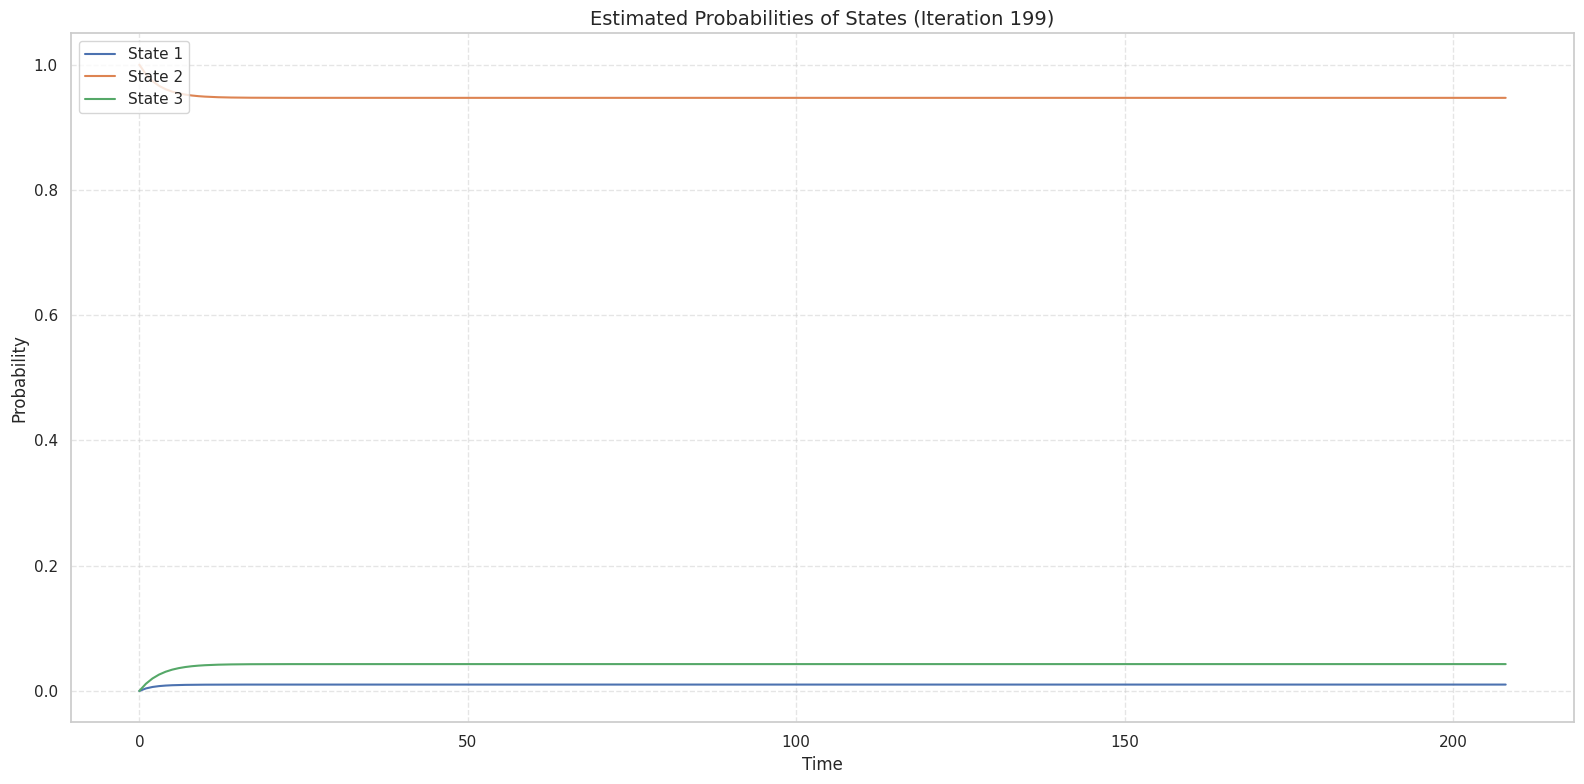

Final Estimates:
Mu: [9.75844815 9.75844815 9.75844815]
Sigma: [9.8115005  9.79130043 9.81845646]
Transition Matrix:
[[0.54269461 0.38637021 0.07093518]
 [0.00398395 0.98460016 0.0114159 ]
 [0.02041173 0.24869353 0.73089474]]
Initial Probabilities: [2.35110719e-57 1.00000000e+00 2.41313109e-10]
Maximum difference: 0.011003769777229383
[[0.0039838  0.98460106 0.01141514]
 [0.00631753 0.97381683 0.01986563]
 [0.00771363 0.96620153 0.02608484]
 [0.00856794 0.96078926 0.03064281]
 [0.00910306 0.95692374 0.0339732 ]
 [0.00944605 0.95415274 0.03640121]
 [0.00967069 0.95216086 0.03816845]
 [0.00982075 0.95072587 0.03945339]
 [0.00992271 0.94969037 0.04038692]
 [0.00999296 0.94894245 0.04106458]
 [0.01004193 0.9484018  0.04155627]
 [0.01007639 0.9480106  0.04191301]
 [0.0101008  0.94772759 0.04217161]
 [0.01011812 0.94752328 0.0423586 ]
 [0.01013054 0.9473752  0.04249426]
 [0.01013943 0.94726809 0.04259248]
 [0.01014585 0.94719042 0.04266373]
 [0.01015045 0.94713435 0.0427152 ]
 [0.0101537  0.

In [ ]:
# Initialize parameters
T = len(YData)
N = 3 # 3 states

# SET INITIAL GUESSES

mu_hat0 = [10.0, 10.0, 10.0]*np.ones((N))
sigma_hat0 = [0.1, 0.3, 0.2]*np.ones((N))
P_hat0 = np.array([
    [0.75, 0.2, 0.05],
    [0.1, 0.8, 0.1],
    [0.05, 0.15, 0.8]
])

# Set as initial probability the stationary distribution
pi_hat0 = [0.25, 0.5, 0.25]*np.ones((N))
for t in range(1, 100):
    pi_hat0 = np.dot(P_hat0.T, pi_hat0)

# Determine maximum number of iterations until convergence and convergence tolerance
itemax = 200
itetol = 1e-2

for ite in range(0, itemax):
    # print(mu_hat0, sigma_hat0, P_hat0, pi_hat0)

    # E-step
    xi_prob_t, xi_prob_t1 = forward_alg(
        pi_hat0, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )
    xi_prob_T = backward_alg(
        xi_prob_t, xi_prob_t1, N, T, P_hat0, mu_hat0, sigma_hat0, YData
    )

    # Compute Pr(s_t+1 = j, s_t = i)
    P_hat_T = np.zeros((N, N, T))
    for tt in range(1, T):
        for ss in range(0, N):
            for ss2 in range(0, N):
                P_hat_T[ss, ss2, tt] = (
                    P_hat0[ss, ss2]
                    * xi_prob_t[tt - 1, ss]
                    * xi_prob_T[tt, ss2]
                    / xi_prob_t1[tt - 1, ss2]
                )
    # M-step
    mu_hat1, sigma_hat1, P_hat1, pi_hat1 = M_step_func_shared_mu(xi_prob_T, P_hat_T, N, T, YData)

    diff = np.zeros((4))
    diff[0] = np.sum(np.absolute(mu_hat1 - mu_hat0)) / (np.min(mu_hat0) + itetol * 1e-2)
    diff[1] = np.sum(np.absolute(sigma_hat1 - sigma_hat0)) / (
        np.min(sigma_hat0) + itetol * 1e-2
    )
    diff[2] = np.sum(np.absolute(np.subtract(P_hat1, P_hat0))) / (
        np.min(P_hat0) + itetol * 1e-2
    )
    diff[3] = np.sum(np.absolute(pi_hat1 - pi_hat0)) / (np.min(pi_hat0) + itetol * 1e-2)
    if np.max(diff) <= itetol or ite==itemax-1:
        print(ite)
        plt.figure(figsize=(16, 8))
        for i in range(N):
            plt.plot(xi_prob_T[:, i], label=f"State {i+1}")
        plt.title(f"Estimated Probabilities of States (Iteration {ite})", fontsize=14)
        plt.xlabel("Time", fontsize=12)
        plt.ylabel("Probability", fontsize=12)
        plt.legend(loc='upper left')
        plt.grid(alpha=0.5, linestyle="--")
        plt.tight_layout()
        plt.show()
        print("Final Estimates:")
        print(f"Mu: {mu_hat1}")
        print(f"Sigma: {sigma_hat1}")
        print("Transition Matrix:")
        print(P_hat1)
        print(f"Initial Probabilities: {pi_hat1}")
        print(f"Maximum difference: {np.max(diff)}")
        llk = log_likelihood(xi_prob_t1, pi_hat0, mu_hat0, sigma_hat0, YData)
        print(f"Log likelihood: {llk}")
        break
    elif np.max(diff) > itetol:
        mu_hat0, sigma_hat0, P_hat0, pi_hat0 = mu_hat1, sigma_hat1, P_hat1, pi_hat1

In [ ]:
num_obs = T  # Number of observations
num_params = 2 * N + N * (N - 1)  # Number of parameters
log_likelihood_val = 192.7867960143255

# Compute AIC and BIC
aic, bic = compute_information_criteria(log_likelihood_val, num_params, num_obs)
print(f"III. With 3 states, different sigmas with the same mus: AIC: {aic}, BIC: {bic}")

III. With 3 states, different sigmas with the same mus: AIC: -361.573592028651, BIC: -321.46558100507326


STEP 3

STEP 4

In [ ]:
print("Variance of BTC log prices:", YData.var())

Variance of BTC log prices: 0.6718553648964266


In [ ]:
import statsmodels.api as sm
mod_btc_shared_variance = sm.tsa.MarkovAutoregression(
    btc_dataset["Close"], k_regimes=3, order=1, switching_ar=True, switching_variance=False
)

# Fit the model
res_btc_shared_variance = mod_btc_shared_variance.fit()

In [ ]:
res_btc_shared_variance.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                  BTC-USD   No. Observations:                  208
Model:             MarkovAutoregression   Log Likelihood               -1951.857
Date:                  Tue, 28 Jan 2025   AIC                           3929.714
Time:                          20:36:56   BIC                           3973.102
Sample:                      01-01-2019   HQIC                          3947.258
                           - 12-27-2022                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.787e+04   1783.714     21.231      0.000    3.44e+04    4.14e+04
ar.L1          0.1624      0.092      1.760      0.078      -0.018       0.343
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.162e+04   1.22e-12   3.41e+16      0.000    4.16e+04    4.16e+04
ar.L1         -0.9997   7.19e-12  -1.39e+11      0.000      -1.000      -1.000
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.315e+04   4020.178      5.758      0.000    1.53e+04     3.1e+04
ar.L1          0.9937      0.011     88.322      0.000       0.972       1.016
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      7.561e+06      6.694   1.13e+06      0.000    7.56e+06    7.56e+06
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.7949      0.177      4.492      0.000       0.448       1.142
p[1->0]        1.0000   1214.587      0.001      0.999   -2379.547    2381.547
p[2->0]        0.0051      0.005      0.986      0.324      -0.005       0.015
p[0->1]    4.964e-234   7.59e-06  6.54e-229      1.000   -1.49e-05    1.49e-05
p[1->1]     1.361e-35    909.103    1.5e-38      1.000   -1781.809    1781.809
p[2->1]    7.676e-208        nan        nan        nan         nan         nan
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 5.02e+45. Standard errors may be unstable.
"""

In [ ]:
import statsmodels.api as sm
mod_btc_switching_ar = sm.tsa.MarkovAutoregression(
    btc_dataset["Close"], k_regimes=3, order=1, switching_ar=False, switching_variance=True
)

# Fit the model
res_btc_switching_ar = mod_btc_switching_ar.fit()

res_btc_switching_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:                  BTC-USD   No. Observations:                  208
Model:             MarkovAutoregression   Log Likelihood               -1879.647
Date:                  Tue, 28 Jan 2025   AIC                           3785.294
Time:                          20:36:58   BIC                           3828.682
Sample:                      01-01-2019   HQIC                          3802.838
                           - 12-27-2022                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.032e+04   6141.786      1.681      0.093   -1714.470    2.24e+04
sigma2      6.616e+05    329.071   2010.567      0.000    6.61e+05    6.62e+05
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.152e+04   6512.650      4.840      0.000    1.88e+04    4.43e+04
sigma2      1.002e+07     14.813   6.77e+05      0.000       1e+07       1e+07
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.533e+04   7160.551      6.330      0.000    3.13e+04    5.94e+04
sigma2       1.87e+07      2.530   7.39e+06      0.000    1.87e+07    1.87e+07
                           Non-switching parameters                           
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9791      0.032     30.956      0.000       0.917       1.041
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]        0.9952        nan        nan        nan         nan         nan
p[1->0]        0.0139      0.017      0.817      0.414      -0.019       0.047
p[2->0]     1.069e-10        nan        nan        nan         nan         nan
p[0->1]        0.0048      0.005      0.969      0.332      -0.005       0.015
p[1->1]        0.9716      0.025     39.585      0.000       0.923       1.020
p[2->1]        0.0113      0.009      1.231      0.218      -0.007       0.029
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number 1.65e+23. Standard errors may be unstable.
"""

# failing to fit so trying with initial guess

    Regime Probabilities (3 values): [0.33, 0.33, 0.34] (should sum to 1)
    Regime-Specific Means (mu) (3 values): [10000, 20000, 30000] (adjust based on the scale of your data)
    Regime-Specific Standard Deviations (sigma) (3 values): [0.1, 0.2, 0.3] (adjust based on the volatility of your data)
    Transition Probabilities (9 values):
        State 1 to State 1, State 1 to State 2, State 1 to State 3: [0.8, 0.1, 0.1] (should sum to 1)
        State 2 to State 1, State 2 to State 2, State 2 to State 3: [0.1, 0.8, 0.1] (should sum to 1)
        State 3 to State 1, State 3 to State 2, State 3 to State 3: [0.1, 0.1, 0.8] (should sum to 1)


In [ ]:
import statsmodels.api as sm

# 1. Try different starting parameters
start_params2 = [0.5, 0.5, 10000, 20000, 30000, 0.1, 0.2, 0.3, 0.9, 0.1, 0.1, 0.8, 0.1, 0.9]
start_params3 = [0.33, 0.33, 0.34,  # Regime probabilities
                10000, 20000, 30000,  # Regime-specific means (mu)
                0.1, 0.2, 0.3,  # Regime-specific standard deviations (sigma)
                0.8, 0.1, 0.1,  # Transition probabilities (state 1)
                0.1, 0.8, 0.1,  # Transition probabilities (state 2)
                0.1, 0.1, 0.8]  # Transition probabilities (state 3)
start_params=start_params2
# 2. Adjust the number of regimes (try 2 regimes here)
k_regimes = 2

mod_btc = sm.tsa.MarkovAutoregression(
    btc_dataset["Close"], k_regimes=k_regimes, order=1, switching_ar=True, switching_variance=True
)

# Fit the model
res_btc = mod_btc.fit(start_params=start_params)

res_btc.summary()

LinAlgError: SVD did not converge

## Addressing LinAlgError: SVD did not converge
by Data scaling:

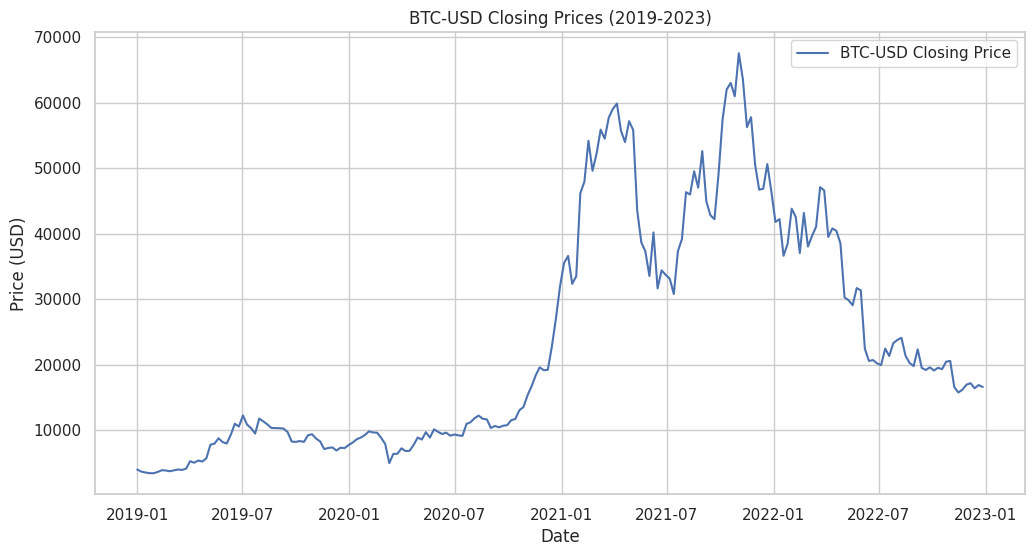

In [ ]:
# Plot BTC closing prices
plt.figure(figsize=(12, 6))
plt.plot(btc_dataset.index, btc_dataset['Close'], label='BTC-USD Closing Price')
plt.title('BTC-USD Closing Prices (2019-2023)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
btc_dataset['Scaled_Close'] = scaler.fit_transform(btc_dataset[['Close']])

   # Use 'Scaled_Close' in the MarkovAutoregression model
mod_btc = sm.tsa.MarkovAutoregression(
     btc_dataset["Scaled_Close"], k_regimes=3, order=1, switching_ar=True, switching_variance=True
)

In [ ]:

# Starting parameters for k_regimes=3
start_params = [0.33, 0.33, 0.34,  # Regime probabilities
                10000, 20000, 30000,  # Regime-specific means (mu)
                0.1, 0.2, 0.3,  # Regime-specific standard deviations (sigma)
                0.8, 0.1, 0.1,  # Transition probabilities (state 1)
                0.1, 0.8, 0.1,  # Transition probabilities (state 2)
                0.1, 0.1, 0.8]  # Transition probabilities (state 3)

# Scale the data
scaler = StandardScaler()
btc_dataset['Scaled_Close'] = scaler.fit_transform(btc_dataset[['Close']])

# Use scaled data in the model
mod_btc = sm.tsa.MarkovAutoregression(
    btc_dataset["Scaled_Close"], k_regimes=3, order=1, switching_ar=True, switching_variance=True
)

# Fit the model
res_btc = mod_btc.fit(start_params=start_params)

res_btc.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                         Markov Switching Model Results                         
================================================================================
Dep. Variable:             Scaled_Close   No. Observations:                  208
Model:             MarkovAutoregression   Log Likelihood                  92.857
Date:                  Tue, 28 Jan 2025   AIC                           -149.713
Time:                          20:50:08   BIC                            -89.637
Sample:                      01-01-2019   HQIC                          -125.422
                           - 12-27-2022                                         
Covariance Type:                 approx                                         
                             Regime 0 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4519        nan        nan        nan         nan         nan
sigma2      7.989e-19        nan        nan        nan         nan         nan
ar.L1          0.3993   7.36e-10   5.42e+08      0.000       0.399       0.399
                             Regime 1 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1225        nan        nan        nan         nan         nan
sigma2         0.0254      0.002     10.354      0.000       0.021       0.030
ar.L1          0.9837   3.21e-05   3.07e+04      0.000       0.984       0.984
                             Regime 2 parameters                              
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2484        nan        nan        nan         nan         nan
sigma2         0.0986        nan        nan        nan         nan         nan
ar.L1          0.4587        nan        nan        nan         nan         nan
                         Regime transition parameters                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
p[0->0]     3.508e-06        nan        nan        nan         nan         nan
p[1->0]      1.34e-05   1.34e-05      1.000      0.317   -1.29e-05    3.97e-05
p[2->0]     2.203e-06        nan        nan        nan         nan         nan
p[0->1]        1.0000        nan        nan        nan         nan         nan
p[1->1]        1.0000        nan        nan        nan         nan         nan
p[2->1]        1.0000        nan        nan        nan         nan         nan
==============================================================================

Warnings:
[1] Covariance matrix calculated using numerical (complex-step) differentiation.
[2] Covariance matrix is singular or near-singular, with condition number    inf. Standard errors may be unstable.
"""

Sources:
* github.com/statsmodels/statsmodels/issues/8416
* stackoverflow.com/questions/27309243/python-statsmodels-arima-linalgerror-svd-did-not-converge
* stackoverflow.com/questions/21827594/raise-linalgerrorsvd-did-not-converge-linalgerror-svd-did-not-converge-in-m
* github.com/statsmodels/statsmodels/issues/3094

* J. D. Hamilton. Time series analysis. Princeton University Press, 1994
* Ahmed Bouteska, Taimur Sharif, Mohammad Zoynul Abedin, COVID-19 and stock returns: Evidence from the Markov switching dependence approach, Research in International Business and Finance, Volume 64,2023,101882,ISSN 0275-5319, https://doi.org/10.1016/j.ribaf.2023.101882.
* Hamilton, James D. Time Series Analysis. Princeton University Press, 1994. (Chapter 22: "Modeling Time Series with Changes in Regime")
de Oliveira, A.M.B., Mandal, A. & Power, G.J. Impact of COVID-19 on Stock Indices Volatility: Long-Memory Persistence, Structural Breaks, or Both?. Ann. Data. Sci. 11, 619–646 (2024). https://doi.org/10.1007/s40745-022-00446-0
* Grayscale Bitcoin Mini Trust ETF Overview - BTC
* CBOE Volatility Index (^VIX) Stock Price, News, Quote & History - Yahoo Finance
* FVX | CBOE 5 Year Treasury Note Yield Index Overview | MarketWatch

